<center><img src="https://synapsedatascience.com.br/wp-content/uploads/2020/12/logo-jupyter.png" width="300"/></center>

In [1]:
## Quem for utilizar o conda (problemas de versão)
# conda install networkx -y
# conda install decorator=5.0.5 -y
# conda install matplotlib=2.2.3 -y

# Instalar as bibliotecas utilizando o pip
!pip install networkx
!pip install matplotlib

In [2]:
# Importar as bibliotecas
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Análise de rede social usando Python

## 1.1 Conceitos básicos

Elementos básicos de uma rede:
- **Vértices (nós)**: entidades/pessoas da rede.
- **Arestas (linhas)**: conexão entre os nós da rede.

<center><img src="imagens/rede simples.png" width="300"/></center>

## 1.1.1 Redes Simétricas (ex: Facebook)

A relação de amigos deo Facebook forma uma rede simétrica, pois se João é amigo de Maria, então necessariamente Maria é amiga de João.

Vamos criar a nossa primeira rede de amigos do Facebook. 

In [3]:
# Criando nossa rede simétrica
G_Fb = nx.Graph()

G_Fb.add_edge('Maria',  'João')
G_Fb.add_edge('João',  'Enzo')
G_Fb.add_edge('Enzo', 'Maria')
G_Fb.add_edge('Maria', 'Valentina')

In [4]:
# Mostrar informações da nossa rede
print(nx.info(G_Fb))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


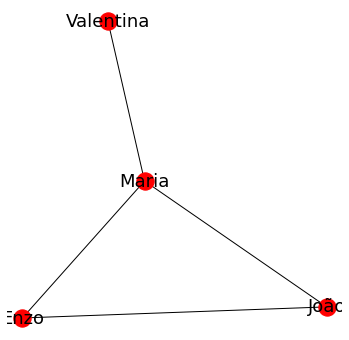

In [5]:
plt.figure(figsize=(6,6))
plt.axis("off")

# Manter a rede na mesma posição
np.random.seed(0)
# Criar o layout da nossa rede
position = nx.spring_layout(G_Fb)

# Desenhar a rede
nx.draw_networkx(G_Fb, pos=position, node_color='red', font_size=18);

## 1.1.2 Redes Assimétricas (ex: Instagram)

Vamos criar a nossa rede de seguidores do Instagram. Nesse caso a nossa rede é assimétrica, porque João pode seguir Maria, porém Maria pode seguir João ou não.

Vamos criar a nossa rede de seguidores do Instagram. 

In [6]:
# Criando nossa rede assimétrica
G_In = nx.DiGraph()

G_In.add_edge('Maria',  'João')
G_In.add_edge('João',  'Enzo')
G_In.add_edge('Enzo', 'Maria')
G_In.add_edge('Maria', 'Valentina')
G_In.add_edge('Valentina', 'Maria')

In [7]:
# Mostrar informações da nossa rede
print(nx.info(G_In))

Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 5
Average in degree:   1.2500
Average out degree:   1.2500


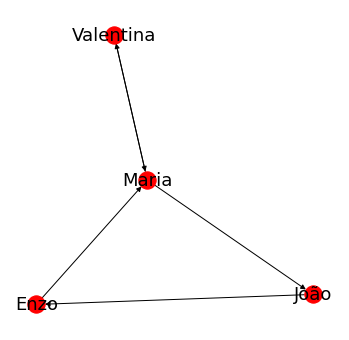

In [8]:
plt.figure(figsize=(6,6))
plt.axis("off")

# Manter a rede na mesma posição
np.random.seed(0)

nx.draw_networkx(G_In, pos=position, node_color='red', font_size=18)

## 1.2 Métricas básicas

### 1.2.1 Qual a pessoa que tem mais seguidores?

In [9]:
# Calcular o grau de centralidade
nx.degree_centrality(G_In)

{'Maria': 1.3333333333333333,
 'João': 0.6666666666666666,
 'Enzo': 0.6666666666666666,
 'Valentina': 0.6666666666666666}

### 1.2.2 Calcular o menor caminho entre duas pessoas

In [10]:
# Usar o algoritmo de shortest path
nx.shortest_path(G_In, 'João', 'Valentina')

['João', 'Enzo', 'Maria', 'Valentina']

# 2. Análise com exemplo real do Facebook

Vamos usar um conjunto de dados de **listas de amigos** do Facebook. Os dados foram coletados dos participantes de uma pesquisa através do aplicativo do Facebook.

## 2.1. Carregar e visualizar os dados

O conjunto de dados está disponível publicamente no site da universidade de Stanford: https://snap.stanford.edu/data/ego-Facebook.html

In [11]:
# Carregar os dados
G_FB = nx.read_edgelist("data/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [12]:
# Mostrar informações da nossa rede
print(nx.info(G_FB))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


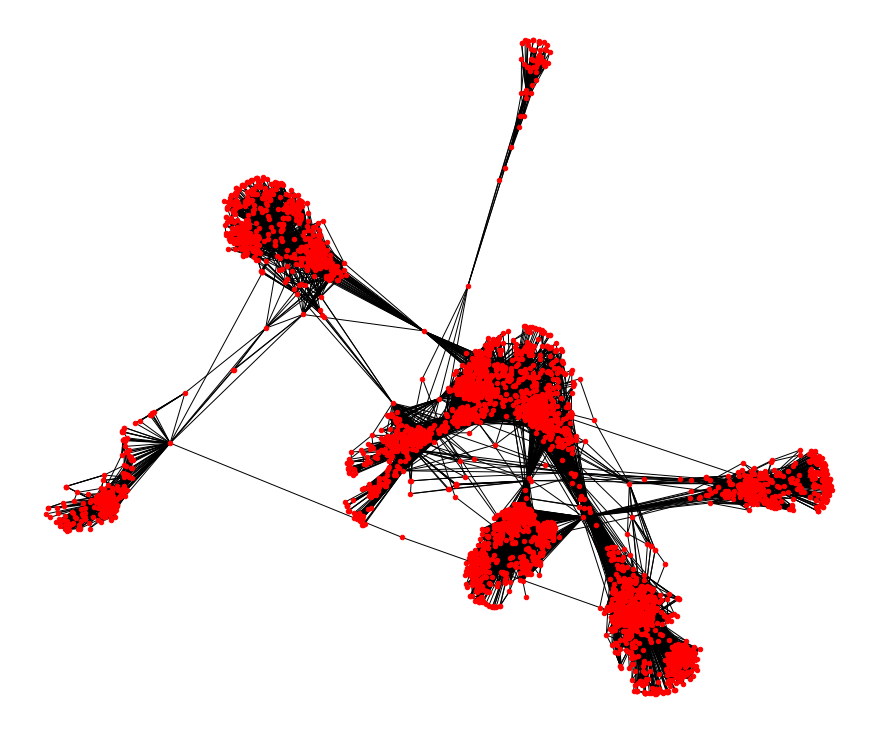

In [13]:
# Aumentar o tamanho da figura usando o matplotlib
plt.figure(figsize=(12,10))

# Criar o layout da nossa rede
spring_pos = nx.spring_layout(G_FB)

# Desenhar a nossa rede
nx.draw(G_FB, node_size=20, pos=spring_pos, node_color='red')

## 2.2. Detectar as comunidades

In [14]:
# Instalar a biblioteca
!pip install python-louvain

Documentação do NetworkX descrevendo o uso do algoritmo de detecção de comunidades: https://python-louvain.readthedocs.io/en/latest/

In [15]:
# Importar nosso algoritmo de detecção de comunidades
from community import community_louvain

In [16]:
# Computar os grupos
partitions = community_louvain.best_partition(G_FB)

# Transformar os valores em lista
values = list(partitions.values())

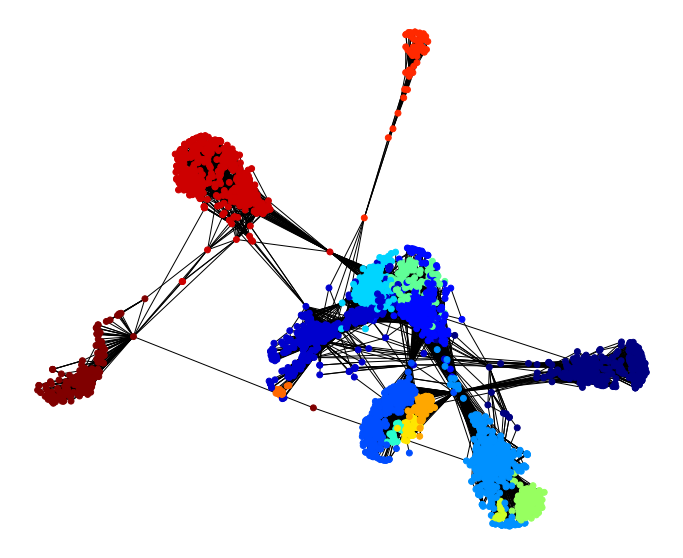

In [17]:
plt.figure(figsize=(12,10))
plt.axis("off")

# Mostrar as diferentes comunidades identificadas separado por cor
nx.draw_networkx(G_FB, pos=spring_pos, cmap=plt.get_cmap("jet"), 
                 node_color=values, node_size=35, with_labels = False)

## 2.3. Separar uma comunidade

Vamos primeiro verificar quantas comunidades foram detectadas pelo o algoritmo.

In [18]:
list(set(values))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

Vamos separar uma comunidade e mostrar a rede de relações

In [19]:
# Separar uma comunidade (cluster)
cluster_id = 0

cluster = [node for node in G_FB.nodes() if partitions[node] == cluster_id]

In [20]:
# Criar um subgraph passando os nós selecionados
cluster = G_FB.subgraph(cluster)

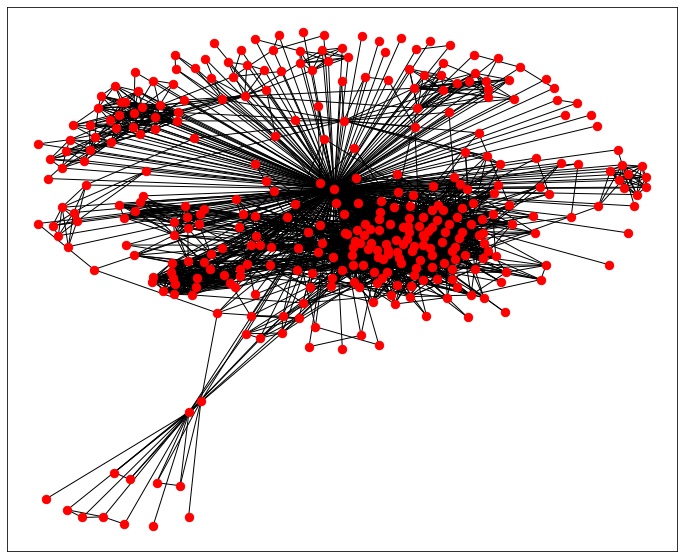

In [21]:
plt.figure(figsize=(12,10))

nx.draw_networkx(cluster, node_color='red', 
                 node_size=70, with_labels = False)

Com um conjunto de features de cada pessoa da nossa rede, nós podemos identificar quais as caraterísticas que predominam em cada grupo e definir diferentes perfis. Com essas informações nós podemos sugerir diferentes conteúdos e produtos para cada perfil.